# 초음파 광물 예측 데이터

- 1988년 존스홉킨스대학교의 세즈노프스키 교수가 1986년 힌튼 교수가 발표한 역전파 알고리즘에 관심을 갖고 은닉층과 역전파의 효과를 실험하기 위해 정리한 데이터
- 광석과 일반 돌에 각각 음파 탐지기를 쏜 후 그 결과를 정리

In [73]:
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
import missingno as msno

In [2]:
df = pd.read_csv("./data/sonar.csv", header = None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [4]:
df[60].value_counts()

60
M    111
R     97
Name: count, dtype: int64

In [5]:
df.shape

(208, 61)

In [6]:
df[60].unique()

array(['R', 'M'], dtype=object)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

In [8]:
df.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
       ...   
56    float64
57    float64
58    float64
59    float64
60     object
Length: 61, dtype: object

In [9]:
df[60] = df[60].map({"M" : 0, "R" : 1})

In [10]:
# 데이터 분류
x = df.drop(60, axis = 1)
y = df[60]

In [11]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,1
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,1
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,1
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,1
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,1


In [12]:
x.shape, y.shape

((208, 60), (208,))

In [13]:
endcoded_y = keras.utils.to_categorical(y)

In [14]:
endcoded_y

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, endcoded_y, stratify = endcoded_y, 
                                                    test_size = 0.3,
                                                   random_state =11)

In [16]:
x_sub, x_val, y_sub, y_val = train_test_split(x_train, y_train, stratify = y_train,
                                             test_size = 0.3, random_state = 11)

In [17]:
y_val[:5]

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.]])

In [18]:
model = keras.Sequential()
model.add(keras.layers.Dense(100, activation = "relu", input_shape = (60,)))
model.add(keras.layers.Dense(60, activation = "relu"))
model.add(keras.layers.Dense(40, activation = "relu"))
model.add(keras.layers.Dense(20, activation = "relu"))
model.add(keras.layers.Dense(2, activation = "softmax"))

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.compile(loss = "categorical_crossentropy",
              optimizer = "adam", metrics = ["accuracy"])

In [20]:
history = model.fit(x_sub, y_sub, epochs = 100, batch_size = 16, validation_data = (x_val, y_val))

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.4364 - loss: 0.7000 - val_accuracy: 0.5455 - val_loss: 0.6764
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6444 - loss: 0.6689 - val_accuracy: 0.6136 - val_loss: 0.6608
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7149 - loss: 0.6361 - val_accuracy: 0.5682 - val_loss: 0.6537
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7065 - loss: 0.6163 - val_accuracy: 0.5909 - val_loss: 0.6433
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7227 - loss: 0.6038 - val_accuracy: 0.5909 - val_loss: 0.6297
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8123 - loss: 0.5615 - val_accuracy: 0.5682 - val_loss: 0.6272
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8110 - loss: 0.5058 - val_accuracy: 0.7273 - val_loss: 0.6058
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7057 - loss: 0.5096 - val_accuracy: 0.5909 - val_loss: 0.5996

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0058 - val_accuracy: 0.7727 - val_loss: 0.7290
Epoch 53/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0049 - val_accuracy: 0.7045 - val_loss: 0.7861
Epoch 54/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0054 - val_accuracy: 0.7500 - val_loss: 0.7403
Epoch 55/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0050 - val_accuracy: 0.7955 - val_loss: 0.7100
Epoch 56/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0074 - val_accuracy: 0.6591 - val_loss: 0.8396
Epoch 57/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0058 - val_accuracy: 0.7727 - val_loss: 0.7585
Epoch 58/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0033 - val_accuracy: 0.7727 - val_loss: 0.7495
Epoch 59/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0028 - val_accuracy: 0.7727 - val_loss: 0.7671
Epoch

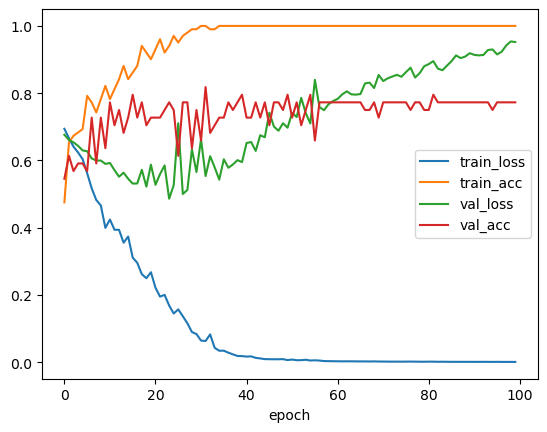

In [21]:
plt.figure()

plt.plot(history.history["loss"], label = "train_loss")
plt.plot(history.history["accuracy"], label = "train_acc")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.plot(history.history["val_accuracy"], label = "val_acc")

plt.legend()
plt.xlabel("epoch")
plt.show()

# case2

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, stratify = y,
                                                   random_state = 11)

In [23]:
print(x_train.shape, y_train.shape)

(145, 60) (145,)


In [24]:
print(x_test.shape, y_test.shape)

(63, 60) (63,)


In [25]:
mm = MinMaxScaler()
scaled_train = mm.fit_transform(x_train)
scaled_test = mm.transform(x_test)

In [26]:
model = keras.Sequential([
    keras.layers.Dense(100, activation = "relu", input_shape = (60,)),
    keras.layers.Dense(80, activation = "relu"),
    keras.layers.Dense(60, activation = "relu"),
    keras.layers.Dense(40, activation = "relu"),
    keras.layers.Dense(20, activation = "relu"),
    keras.layers.Dense(10, activation = "relu"),
    keras.layers.Dense(2, activation = "softmax")
])

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 100)                 │           6,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 80)                  │           8,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 60)                  │           4,860 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 40)                  │           2,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 20)                  │             820 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 2)                   │              22 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,532 (88.02 KB)

 Trainable params: 22,532 (88.02 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy",
             metrics = ["accuracy"])

In [29]:
history2 = model.fit(scaled_train, y_train, epochs = 100, batch_size = 16, validation_data = (scaled_test, y_test))

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5546 - loss: 0.6878 - val_accuracy: 0.6190 - val_loss: 0.6732
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6602 - loss: 0.6560 - val_accuracy: 0.6190 - val_loss: 0.6588
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6302 - loss: 0.6244 - val_accuracy: 0.6508 - val_loss: 0.6377
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6560 - loss: 0.5898 - val_accuracy: 0.6667 - val_loss: 0.6312
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6448 - loss: 0.5809 - val_accuracy: 0.6825 - val_loss: 0.6015
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8745 - loss: 0.5006 - val_accuracy: 0.7143 - val_loss: 0.6041
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8078 - loss: 0.4578 - val_accuracy: 0.7302 - val_loss: 0.5497
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8132 - loss: 0.4584 - val_accuracy: 0.6984 - 

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0010 - val_accuracy: 0.7460 - val_loss: 1.0224
Epoch 52/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 8.0721e-04 - val_accuracy: 0.7302 - val_loss: 1.0228
Epoch 53/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 9.2272e-04 - val_accuracy: 0.7302 - val_loss: 1.0396
Epoch 54/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 8.3557e-04 - val_accuracy: 0.7302 - val_loss: 1.0439
Epoch 55/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 7.0548e-04 - val_accuracy: 0.7460 - val_loss: 1.0534
Epoch 56/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 6.6769e-04 - val_accuracy: 0.7460 - val_loss: 1.0560
Epoch 57/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 6.5341e-04 - val_accuracy: 0.7302 - val_loss: 1.0605
Epoch 58/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 7.0186e-04 - v

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 1.2412e-04 - val_accuracy: 0.7143 - val_loss: 1.2926


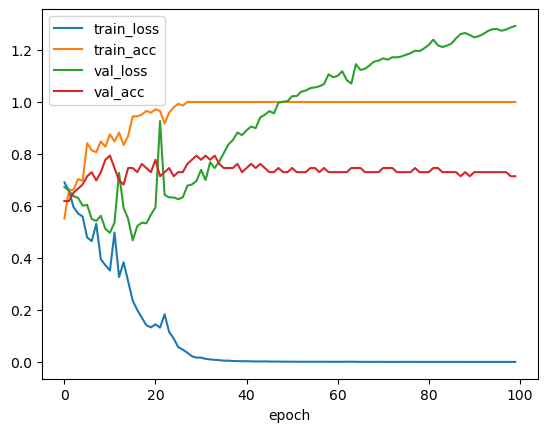

In [30]:
plt.figure()

plt.plot(history2.history["loss"], label = "train_loss")
plt.plot(history2.history["accuracy"], label = "train_acc")
plt.plot(history2.history["val_loss"], label = "val_loss")
plt.plot(history2.history["val_accuracy"], label = "val_acc")

plt.legend()
plt.xlabel("epoch")
plt.show()

# case3

In [31]:
np.unique(df[60], return_counts = True)

(array([0, 1], dtype=int64), array([111,  97], dtype=int64))

In [32]:
y.value_counts()

60
0    111
1     97
Name: count, dtype: int64

In [33]:
# 모델 구성
model = keras.Sequential()
model.add(keras.layers.Dense(100, activation = "relu", input_shape = (60,)))
model.add(keras.layers.Dense(50, activation = "relu"))
model.add(keras.layers.Dense(25, activation = "relu"))
model.add(keras.layers.Dense(2, activation = "softmax"))

In [34]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam",
             metrics = ["accuracy"])

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify = y, test_size = 0.2,
                                                   random_state =12)

In [36]:
x_sub, x_val, y_sub, y_val = train_test_split(x_train, y_train, stratify = y_train,
                                             test_size = 0.2, random_state = 12)

In [37]:
history3 = model.fit(x_sub, y_sub, epochs = 100, validation_data = (x_val, y_val), batch_size = 4)

Epoch 1/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5363 - loss: 0.6769 - val_accuracy: 0.5882 - val_loss: 0.6750
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5467 - loss: 0.6413 - val_accuracy: 0.6471 - val_loss: 0.6446
Epoch 3/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7309 - loss: 0.5902 - val_accuracy: 0.6765 - val_loss: 0.6314
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7748 - loss: 0.5053 - val_accuracy: 0.6471 - val_loss: 0.6947
Epoch 5/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8018 - loss: 0.4948 - val_accuracy: 0.6471 - val_loss: 0.6087
Epoch 6/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8439 - loss: 0.4168 - val_accuracy: 0.7059 - val_loss: 0.6688
Epoch 7/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8014 - loss: 0.4035 - val_accuracy: 0.7059 - val_loss: 0.6995
Epoch 8/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8153 - loss: 0.3534 - val_accuracy: 0.7059 - v

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0028 - val_accuracy: 0.8235 - val_loss: 1.3523
Epoch 52/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0032 - val_accuracy: 0.8235 - val_loss: 1.2353
Epoch 53/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0024 - val_accuracy: 0.8235 - val_loss: 1.2989
Epoch 54/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0021 - val_accuracy: 0.8235 - val_loss: 1.3022
Epoch 55/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0024 - val_accuracy: 0.8529 - val_loss: 1.2376
Epoch 56/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0021 - val_accuracy: 0.8235 - val_loss: 1.3126
Epoch 57/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0024 - val_accuracy: 0.8529 - val_loss: 1.2835
Epoch 58/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 0.8235 - val_lo

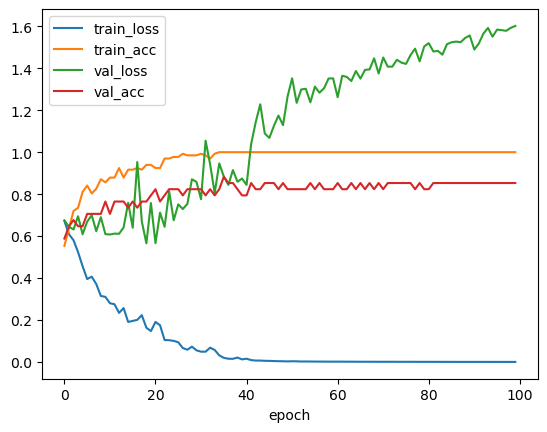

In [38]:
plt.figure()

plt.plot(history3.history["loss"], label = "train_loss")
plt.plot(history3.history["accuracy"], label = "train_acc")
plt.plot(history3.history["val_loss"], label = "val_loss")
plt.plot(history3.history["val_accuracy"], label = "val_acc")

plt.legend()
plt.xlabel("epoch")
plt.show()

# Case4

In [39]:
# 모델 구성
model = keras.Sequential()
model.add(keras.layers.Dense(100, activation = "relu", input_shape = (60,)))
model.add(keras.layers.Dense(50, activation = "relu"))
model.add(keras.layers.Dense(25, activation = "relu"))
model.add(keras.layers.Dense(2, activation = "softmax"))

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [40]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam",
             metrics = ["accuracy"])

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify = y, test_size = 0.2,
                                                   random_state =12)

In [42]:
x_sub, x_val, y_sub, y_val = train_test_split(x_train, y_train, stratify = y_train,
                                             test_size = 0.2, random_state = 12)

In [43]:
history4 = model.fit(x_sub, y_sub, epochs = 50, validation_data = (x_val, y_val), batch_size = 4)

Epoch 1/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5716 - loss: 0.6850 - val_accuracy: 0.6176 - val_loss: 0.6594
Epoch 2/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6161 - loss: 0.6399 - val_accuracy: 0.7059 - val_loss: 0.6241
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7605 - loss: 0.5686 - val_accuracy: 0.7941 - val_loss: 0.5754
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7562 - loss: 0.4798 - val_accuracy: 0.7353 - val_loss: 0.5573
Epoch 5/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7254 - loss: 0.4782 - val_accuracy: 0.7059 - val_loss: 0.5595
Epoch 6/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7574 - loss: 0.4358 - val_accuracy: 0.7059 - val_loss: 0.5889
Epoch 7/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8545 - loss: 0.3799 - val_accuracy: 0.7353 - val_loss: 0.5456
Epoch 8/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8437 - loss: 0.3712 - val_accuracy: 0.7647 - val_loss:

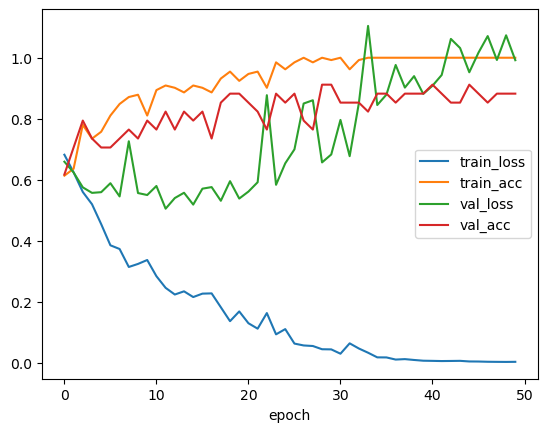

In [44]:
plt.figure()

plt.plot(history4.history["loss"], label = "train_loss")
plt.plot(history4.history["accuracy"], label = "train_acc")
plt.plot(history4.history["val_loss"], label = "val_loss")
plt.plot(history4.history["val_accuracy"], label = "val_acc")

plt.legend()
plt.xlabel("epoch")
plt.show()

# Case5

In [56]:
model2 = keras.Sequential()
model2.add(keras.layers.Dense(100, activation = "relu", input_shape = (60,)))
model2.add(keras.layers.Dropout(0.3))
model2.add(keras.layers.Dense(50, activation = "relu"))
model2.add(keras.layers.Dropout(0.3))
model2.add(keras.layers.Dense(25, activation = "relu"))
model2.add(keras.layers.Dropout(0.3))
model2.add(keras.layers.Dense(2, activation = "sigmoid"))

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [57]:
model2.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam",
             metrics = ["accuracy"])

In [58]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify = y, test_size = 0.2,
                                                   random_state =12)

In [59]:
x_sub, x_val, y_sub, y_val = train_test_split(x_train, y_train, stratify = y_train,
                                             test_size = 0.2, random_state = 12)

In [60]:
history5 = model2.fit(x_sub, y_sub, epochs = 100, batch_size = 8, validation_data = (x_val, y_val))

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4842 - loss: 0.7338 - val_accuracy: 0.5588 - val_loss: 0.6676
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3969 - loss: 0.7418 - val_accuracy: 0.6471 - val_loss: 0.6653
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6435 - loss: 0.6562 - val_accuracy: 0.6471 - val_loss: 0.6511
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6561 - loss: 0.6279 - val_accuracy: 0.7059 - val_loss: 0.6447
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6208 - loss: 0.6369 - val_accuracy: 0.6176 - val_loss: 0.6310
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5497 - loss: 0.6884 - val_accuracy: 0.6471 - val_loss: 0.6260
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7047 - loss: 0.6039 - val_accuracy: 0.6765 - val_loss: 0.6056
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6733 - loss: 0.6279 - val_accuracy: 0.6765 - 

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9542 - loss: 0.1217 - val_accuracy: 0.7647 - val_loss: 0.8033
Epoch 52/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9148 - loss: 0.2169 - val_accuracy: 0.8235 - val_loss: 0.5532
Epoch 53/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9628 - loss: 0.1323 - val_accuracy: 0.8235 - val_loss: 0.6494
Epoch 54/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9193 - loss: 0.1544 - val_accuracy: 0.8529 - val_loss: 0.4923
Epoch 55/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9705 - loss: 0.1171 - val_accuracy: 0.7647 - val_loss: 0.7113
Epoch 56/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9639 - loss: 0.1183 - val_accuracy: 0.8235 - val_loss: 0.5582
Epoch 57/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9352 - loss: 0.1556 - val_accuracy: 0.8529 - val_loss: 0.5603
Epoch 58/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9756 - loss: 0.1057 - val_accuracy: 0.7941 - val_lo

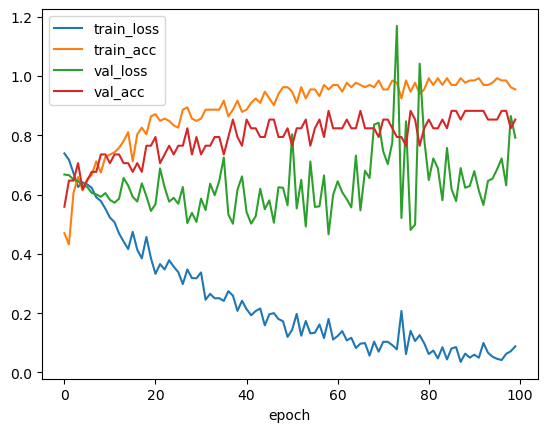

In [61]:
plt.figure()

plt.plot(history5.history["loss"], label = "train_loss")
plt.plot(history5.history["accuracy"], label = "train_acc")
plt.plot(history5.history["val_loss"], label = "val_loss")
plt.plot(history5.history["val_accuracy"], label = "val_acc")

plt.legend()
plt.xlabel("epoch")
plt.show()

# Case6

In [62]:
model2 = keras.Sequential()
model2.add(keras.layers.Dense(150, activation = "relu", input_shape = (60,)))
model2.add(keras.layers.Dropout(0.3))
model2.add(keras.layers.Dense(100, activation = "relu"))
model2.add(keras.layers.Dropout(0.3))
model2.add(keras.layers.Dense(50, activation = "relu"))
model2.add(keras.layers.Dropout(0.3))
model2.add(keras.layers.Dense(25, activation = "relu"))
model2.add(keras.layers.Dropout(0.3))
model2.add(keras.layers.Dense(2, activation = "sigmoid"))

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [67]:
model2.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam",
             metrics = ["accuracy"])

In [68]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify = y, test_size = 0.2,
                                                   random_state =12)

In [69]:
x_sub, x_val, y_sub, y_val = train_test_split(x_train, y_train, stratify = y_train,
                                             test_size = 0.2, random_state = 12)

In [70]:
history6 = model2.fit(x_sub, y_sub, epochs = 200, batch_size = 8, validation_data = (x_val, y_val))

Epoch 1/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5503 - loss: 0.6819 - val_accuracy: 0.5294 - val_loss: 0.6802
Epoch 2/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5076 - loss: 0.6999 - val_accuracy: 0.5294 - val_loss: 0.6758
Epoch 3/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5902 - loss: 0.6920 - val_accuracy: 0.6471 - val_loss: 0.6731
Epoch 4/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5357 - loss: 0.6717 - val_accuracy: 0.6176 - val_loss: 0.6626
Epoch 5/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5914 - loss: 0.6831 - val_accuracy: 0.6471 - val_loss: 0.6500
Epoch 6/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5504 - loss: 0.6661 - val_accuracy: 0.7941 - val_loss: 0.6302
Epoch 7/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6882 - loss: 0.6429 - val_accuracy: 0.7059 - val_loss: 0.6173
Epoch 8/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7216 - loss: 0.5871 - val_accuracy: 0.7647 - 

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9740 - loss: 0.0869 - val_accuracy: 0.8529 - val_loss: 0.5888
Epoch 52/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9301 - loss: 0.1419 - val_accuracy: 0.7941 - val_loss: 0.6980
Epoch 53/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9839 - loss: 0.0566 - val_accuracy: 0.8824 - val_loss: 0.3941
Epoch 54/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9892 - loss: 0.0787 - val_accuracy: 0.8529 - val_loss: 0.4291
Epoch 55/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9700 - loss: 0.1237 - val_accuracy: 0.8235 - val_loss: 0.8353
Epoch 56/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9776 - loss: 0.0866 - val_accuracy: 0.8824 - val_loss: 0.4710
Epoch 57/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9769 - loss: 0.0830 - val_accuracy: 0.7941 - val_loss: 0.9996
Epoch 58/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9091 - loss: 0.2300 - val_accuracy: 0.8529 - val_lo

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9757 - loss: 0.0434 - val_accuracy: 0.8824 - val_loss: 0.8596
Epoch 102/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9884 - loss: 0.0613 - val_accuracy: 0.8824 - val_loss: 0.7698
Epoch 103/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9957 - loss: 0.0280 - val_accuracy: 0.8824 - val_loss: 0.7694
Epoch 104/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9960 - loss: 0.0232 - val_accuracy: 0.8529 - val_loss: 1.2208
Epoch 105/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9814 - loss: 0.0532 - val_accuracy: 0.8824 - val_loss: 1.1898
Epoch 106/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9903 - loss: 0.0381 - val_accuracy: 0.8824 - val_loss: 0.4654
Epoch 107/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9710 - loss: 0.0520 - val_accuracy: 0.8824 - val_loss: 0.6023
Epoch 108/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9862 - loss: 0.0544 - val_accuracy: 0.8824 -

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0210 - val_accuracy: 0.8529 - val_loss: 0.8116
Epoch 152/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9992 - loss: 0.0102 - val_accuracy: 0.8824 - val_loss: 0.6031
Epoch 153/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9983 - loss: 0.0072 - val_accuracy: 0.8529 - val_loss: 0.6810
Epoch 154/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9937 - loss: 0.0299 - val_accuracy: 0.8529 - val_loss: 0.9161
Epoch 155/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0122 - val_accuracy: 0.8824 - val_loss: 1.0349
Epoch 156/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9898 - loss: 0.0188 - val_accuracy: 0.8824 - val_loss: 0.9833
Epoch 157/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0082 - val_accuracy: 0.8824 - val_loss: 1.2478
Epoch 158/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9829 - loss: 0.0265 - val_accuracy: 0.8235 -

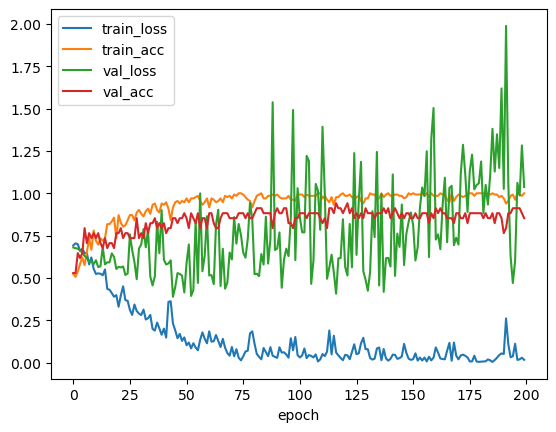

In [71]:
plt.figure()

plt.plot(history6.history["loss"], label = "train_loss")
plt.plot(history6.history["accuracy"], label = "train_acc")
plt.plot(history6.history["val_loss"], label = "val_loss")
plt.plot(history6.history["val_accuracy"], label = "val_acc")

plt.legend()
plt.xlabel("epoch")
plt.show()

# 풀이

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

<Axes: >

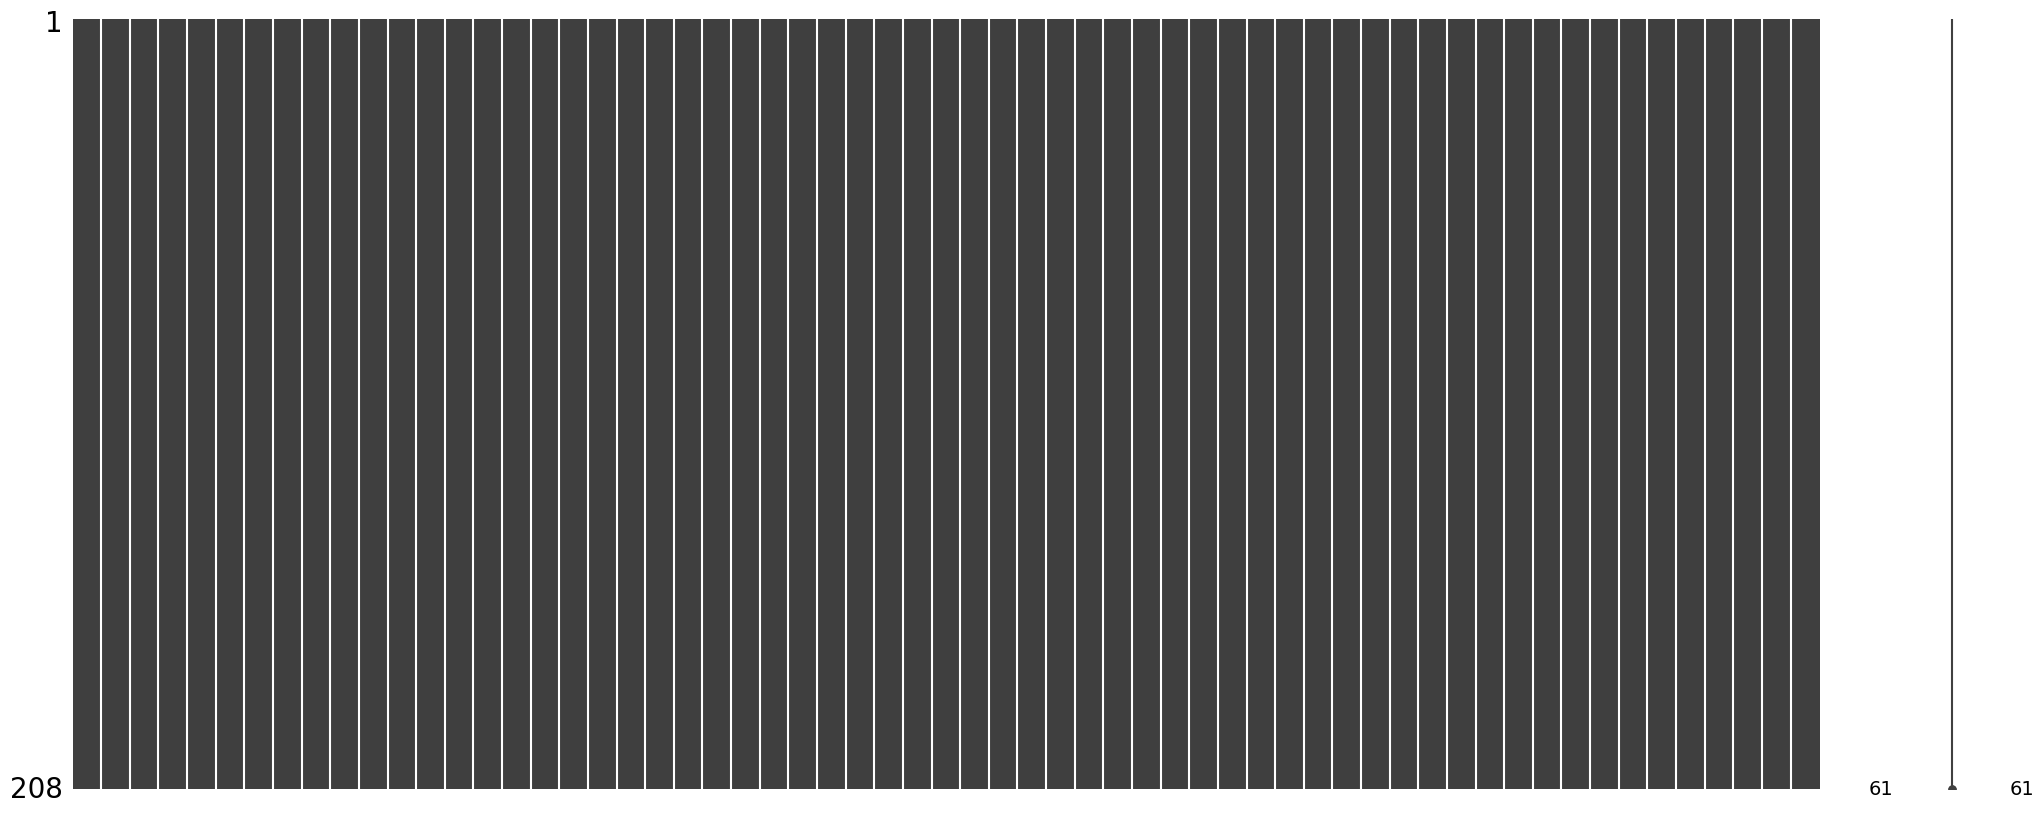

In [75]:
# 결측치 시각화
msno.matrix(df)

In [76]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507,0.466346
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031,0.500070
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600,0.000000
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100,0.000000
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300,0.000000
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525,1.000000
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900,1.000000


# Case 1

- 출력층의 유닛 수 2개


In [78]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [79]:
encoded_y = pd.get_dummies(y)

In [80]:
encoded_y

,0,1
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True
...,...,...
203,True,False
204,True,False
205,True,False
206,True,False


In [81]:
# 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(x, encoded_y, test_size = 0.2,
                                                   stratify = encoded_y, random_state = 12)

In [82]:
x_sub, x_val, y_sub, y_val = train_test_split(x_train, y_train, test_size = 0.2,
                                             stratify = y_train, random_state = 12)

In [84]:
# 스케일링
mm = MinMaxScaler()
scaled_sub = mm.fit_transform(x_sub)
scaled_val = mm.transform(x_val)
scaled_test = mm.transform(x_test)

In [85]:
x_sub.shape

(132, 60)

In [86]:
# 모델 구성
model = keras.Sequential()
model.add(keras.layers.Dense(60, activation = "relu", input_shape = (60,)))
model.add(keras.layers.Dense(30, activation = "relu"))
model.add(keras.layers.Dense(2, activation = "softmax"))

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [87]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_37 (Dense)                     │ (None, 60)                  │           3,660 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 30)                  │           1,830 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 2)                   │              62 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,552 (21.69 KB)

 Trainable params: 5,552 (21.69 KB)

 Non-trainable params: 0 (0.00 B)

In [102]:
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [103]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 4, restore_best_weights = True)

In [104]:
history7 = model.fit(scaled_sub, y_sub, epochs = 100, batch_size = 16, validation_data = (scaled_val, y_val),
                     callbacks = [early_stopping_cb])

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8967 - loss: 0.2392 - val_accuracy: 0.7059 - val_loss: 0.3827
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8963 - loss: 0.2554 - val_accuracy: 0.7353 - val_loss: 0.3943
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8976 - loss: 0.2289 - val_accuracy: 0.7059 - val_loss: 0.4278
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9263 - loss: 0.1830 - val_accuracy: 0.6765 - val_loss: 0.3579
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9145 - loss: 0.2181 - val_accuracy: 0.7353 - val_loss: 0.3829
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9221 - loss: 0.1759 - val_accuracy: 0.7059 - val_loss: 0.3881
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9377 - loss: 0.1699 - val_accuracy: 0.6765 - val_loss: 0.3540
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9182 - loss: 0.2039 - val_accuracy: 0.6765 - val_loss: 0.4219

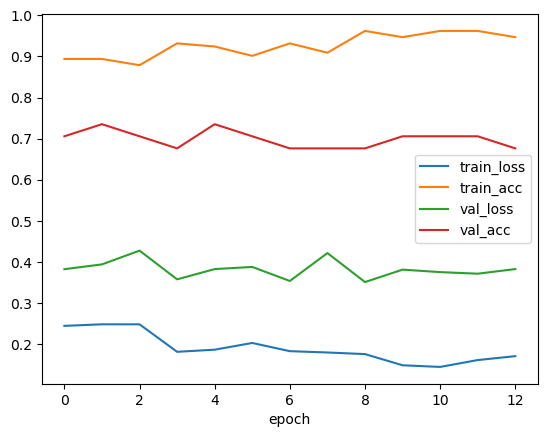

In [105]:
plt.figure()

plt.plot(history7.history["loss"], label = "train_loss")
plt.plot(history7.history["accuracy"], label = "train_acc")
plt.plot(history7.history["val_loss"], label = "val_loss")
plt.plot(history7.history["val_accuracy"], label = "val_acc")

plt.legend()
plt.xlabel("epoch")
plt.show()

In [106]:
model.evaluate(scaled_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7158 - loss: 0.4767 


[0.510417103767395, 0.7142857313156128]

In [107]:
model.predict(scaled_test[:5])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


array([[0.5426394 , 0.45736063],
       [0.9952443 , 0.00475567],
       [0.24775451, 0.7522454 ],
       [0.01929725, 0.98070276],
       [0.04507677, 0.9549232 ]], dtype=float32)

In [108]:
y_test[:5]

,0,1
22,False,True
203,True,False
106,True,False
75,False,True
13,False,True


# Case 2

- 출력층의 유닛 수 1개

In [109]:
le = LabelEncoder()
y = le.fit_transform(y)

In [110]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [111]:
# 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify = y,
                                                   random_state = 12)

In [112]:
x_sub, x_val, y_sub, y_val = train_test_split(x_train, y_train, test_size = 0.2,
                                             stratify = y_train, random_state = 12)

In [113]:
mm = MinMaxScaler()
scaled_sub = mm.fit_transform(x_sub)
scaled_val = mm.transform(x_val)
scaled_test = mm.transform(x_test)

In [114]:
model2 = keras.Sequential()
model2.add(keras.layers.Dense(60, activation = "relu", input_shape = (60,)))
model2.add(keras.layers.Dense(30, activation = "relu"))
model2.add(keras.layers.Dense(1, activation = "sigmoid"))

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [115]:
model2.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_40 (Dense)                     │ (None, 60)                  │           3,660 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 30)                  │           1,830 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_42 (Dense)                     │ (None, 1)                   │              31 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,521 (21.57 KB)

 Trainable params: 5,521 (21.57 KB)

 Non-trainable params: 0 (0.00 B)

In [116]:
model2.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

- categorical_crossentropy = 여러 변수
- binary_crossentropy = 한개 변수

In [117]:
model2.fit(scaled_sub, y_sub, epochs = 100, batch_size = 16, 
           validation_data = (scaled_val, y_val), callbacks = [early_stopping_cb])

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.5309 - loss: 0.6976 - val_accuracy: 0.5294 - val_loss: 0.6954
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5582 - loss: 0.6729 - val_accuracy: 0.5294 - val_loss: 0.6939
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5808 - loss: 0.6580 - val_accuracy: 0.6471 - val_loss: 0.6805
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6271 - loss: 0.6421 - val_accuracy: 0.6471 - val_loss: 0.6649


In [118]:
model2.evaluate(scaled_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5263 - loss: 0.6882 


[0.6918824911117554, 0.523809552192688]

In [120]:
model2.predict(scaled_test[:5])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


array([[0.40169314],
       [0.43161762],
       [0.3955158 ],
       [0.42576444],
       [0.39403045]], dtype=float32)

In [121]:
y_test[:5]

array([0, 1, 1, 0, 1], dtype=int64)